### sklearn.cluster.DBSCAN
#### Density Based Spatial Clustering of Applications with Noise
#### 밀도기반 클러스터링 기법으로, 케이스가 집중되어 있는 밀도에 초점을 두고, 밀도가 높은 그룹을 클러스터링하는 방식인데 중심점을 기준으로 특정 반경 이내에 케이스가 n개 이상 있을 경우 하나의 군집을 형성
- 멀리 떨어진 데이터, 즉 이상값을 탐지하는 용도로 많이 활용

#### 주요 Hyperparameter
- eps(epsilon) : 근접 이웃접을 찾기 위해 정의내려야 하는 반경 거리
- min_samples(minPts) : 하나의 군집을 형성하기 위해 필요한 최소 케이스 수

- 데이터의 케이스 분류
- - Core Point : 엡실론(eps) 반경 내 최소점(min_samples) 이상을 갖는 점
- - Border Point : Core Point의 엡실론 반경 내에 존재하지만, 그 자체로는 최소점을 갖지 못하는 점
- - Noise Point : Core/Border Point가 아닌 점

##### KMeans(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)

# 분석 코드

In [1]:
# 라이브러리 및 데이터 로드
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
import matplotlib.cm
cmap=matplotlib.cm.get_cmap('plasma')
from scipy.stats import randint
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

df = pd.read_csv('../input/big-data-certification-study/iris.csv', encoding='utf-8')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
x=df[df.columns[0:4]]
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# 모델 적용
dbs=DBSCAN(eps=0.5, metric='euclidean',
           min_samples=5)
dbs

DBSCAN()

In [4]:
# 학습
dbs.fit(x)
dbs.labels_

# DBSCAN 설정 기준에 따라 2개의 군집 (0, 1)으로 분류
# -1은 이상값으로, eps와 min_samples에 따라 조절 가능
# labels_로 -1 값을 확인하며 Hyperparameter 조정

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [5]:
# 예측
pred=dbs.fit_predict(x)
pred=pd.DataFrame(pred)
pred.columns=['predict']
pred.head()

,predict
0,0
1,0
2,0
3,0
4,0


In [6]:
# 원데이터와 예측데이터 병합
data=pd.concat([df, pred],axis=1)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class,predict
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [7]:
# class(꽃 종류)와 predict 간 교차표 확인
ct=pd.crosstab(data['class'],data['predict'])
ct
# 데이터 정규화 필요

predict,-1,0,1
class,,,
Iris-setosa,1,49,0
Iris-versicolor,6,0,44
Iris-virginica,10,0,40


In [8]:
# 시각화 - 군집화 경향 및 이상값
# iris 데이터는 class를 제외하고 4차원 데이터이므로
# PCA(주성분분석)을 통한 차원 축소 필요(2차원)
pca_2d=PCA(n_components=2).fit_transform(x) # n_components : n 차원으로 축소

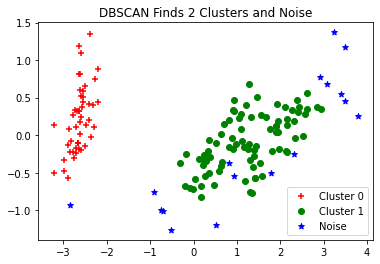

In [9]:
# 군집 0 : 빨간색 +
# 군집 1 : 녹색 O
# 이상값 -1 : 파란색 *
for i in range(pca_2d.shape[0]):
    if dbs.labels_[i]==0:
        c1=plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    elif dbs.labels_[i]==1:
        c2=plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
    elif dbs.labels_[i]== -1:
        c3=plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')

plt.legend([c1,c2,c3],['Cluster 0','Cluster 1','Noise'])
plt.title('DBSCAN Finds 2 Clusters and Noise')
plt.show();